In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
store -r home_path

# Loading data from previous modules

In [27]:
import pickle

files_data = pickle.load(open(home_path + '/1.Load Codes/files.pickle',"rb"))
acorn_data = files_data['acorn_data']
energy_data = files_data['energy_data']
households_data = files_data['households_data']
weather_data = files_data['weather_data']

# 1. Households

In [28]:
# Tou or Std plot - per Acorn group
energy_households = pd.merge(energy_data, households_data, on = 'LCLid')
energy_households = energy_households.groupby(['Acorn', 'stdorToU']).agg({'energy_sum': ['mean']}).reset_index()
energy_households_std = energy_households.loc[energy_households['stdorToU'] == 'Std']
energy_households_tou = energy_households.loc[energy_households['stdorToU'] == 'ToU']
energy_households_std.head()

,Acorn,stdorToU,energy_sum
,,,mean
0,ACORN-A,Std,20.164904
2,ACORN-B,Std,11.344162
4,ACORN-C,Std,12.455898
6,ACORN-D,Std,13.890126
8,ACORN-E,Std,10.659807


Text(0, 0.5, 'Energy_Sum')

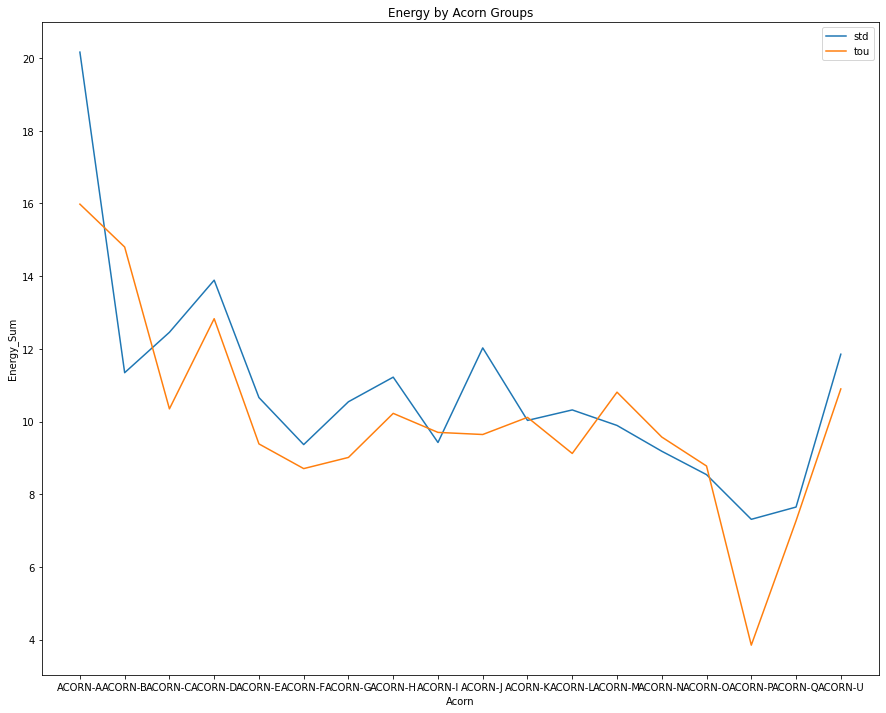

In [29]:
f = plt.figure("Energy by Acorn Groups", figsize=(15, 12))
a = plt.axes()

a.plot(energy_households_std['Acorn'], energy_households_std['energy_sum'], '-', label="std");
a.plot(energy_households_tou['Acorn'], energy_households_tou['energy_sum'], '-', label="tou");
a.legend(loc="upper right")
plt.title("Energy by Acorn Groups")
plt.xlabel('Acorn') 
plt.ylabel('Energy_Sum') 

# 2. Energy

In [30]:
# Daily consumption
# Moving average

In [31]:
energy_data.day = pd.to_datetime(energy_data.day,format='%Y-%m-%d').dt.date
energy_data_day = energy_data.groupby('day').agg({'energy_sum': ['mean']}).reset_index()
energy_data_day['day'] = pd.to_datetime(energy_data_day['day'])

Text(0, 0.5, 'Energy_Sum')

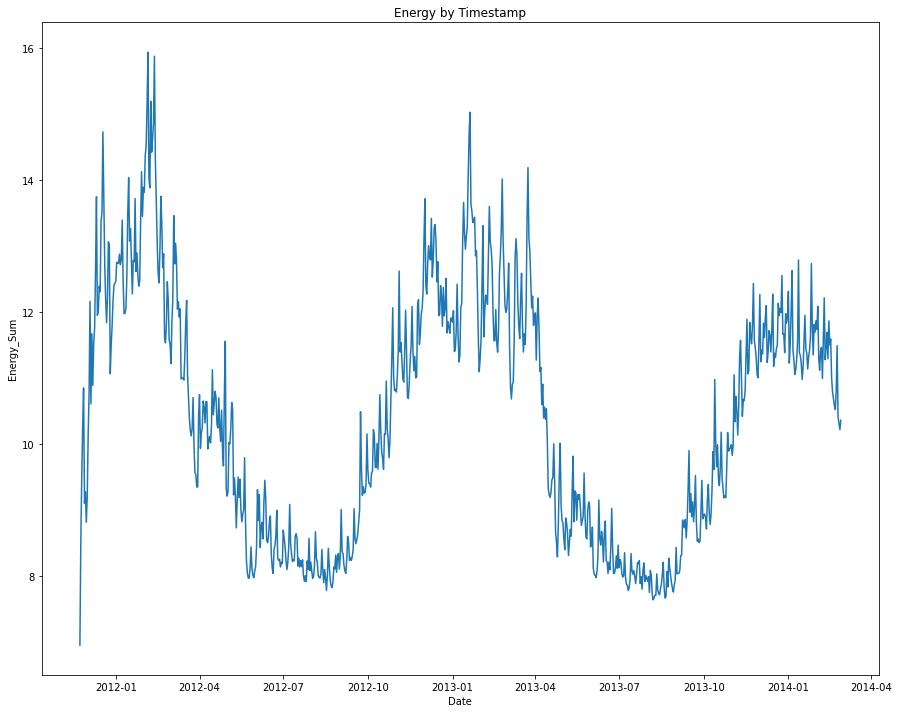

In [49]:
f = plt.figure("Energy by Timestamp", figsize=(15, 12))
a = plt.axes()

a.plot(energy_data_day['day'], energy_data_day['energy_sum'], '-');
plt.title("Energy by Timestamp")
plt.xlabel('Date') 
plt.ylabel('Energy_Sum') 

In [33]:
# computing a 7 day rolling average
energy_data_day[ '7day_rolling_avg' ] = energy_data_day.energy_sum.rolling( 7).mean()

# viewing the dataset
energy_data_day.head(10)

,day,energy_sum,7day_rolling_avg
,,mean,
0,2011-11-23,6.952692,NaN
1,2011-11-24,8.536480,NaN
2,2011-11-25,9.499781,NaN
3,2011-11-26,10.267707,NaN
4,2011-11-27,10.850805,NaN
5,2011-11-28,9.103382,NaN
6,2011-11-29,9.274873,9.212246
7,2011-11-30,8.813513,9.478077
8,2011-12-01,9.227707,9.576824


Text(0, 0.5, 'Energy_Sum')

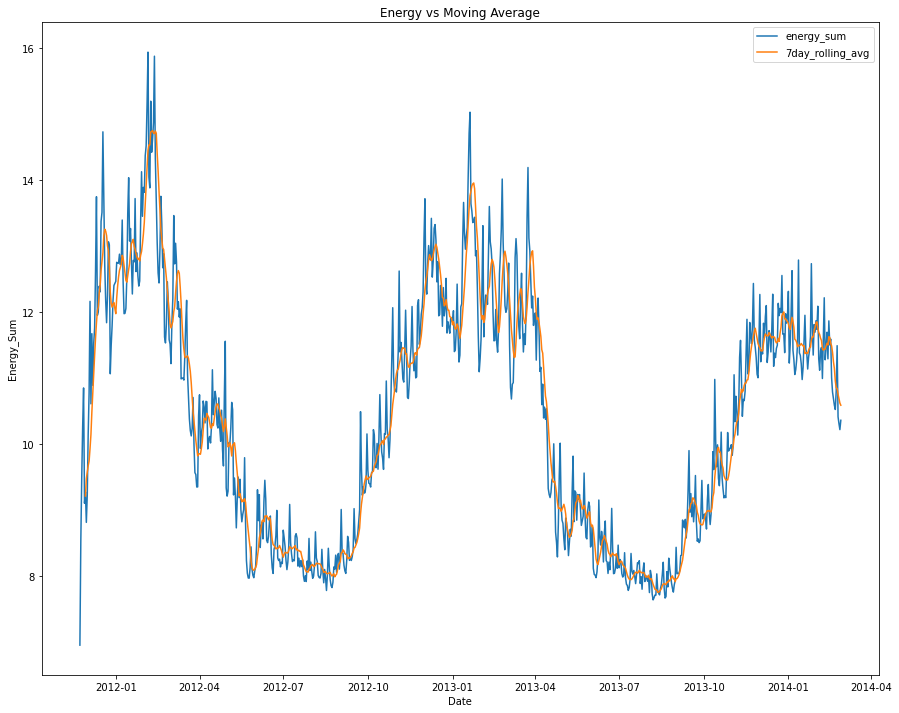

In [50]:
f = plt.figure("Energy vs Moving Average", figsize=(15, 12))
a = plt.axes()

a.plot(energy_data_day['day'], energy_data_day['energy_sum'], '-', label="energy_sum");
a.plot(energy_data_day['day'], energy_data_day['7day_rolling_avg'], '-', label="7day_rolling_avg");
a.legend(loc="upper right")
plt.title("Energy vs Moving Average")
plt.xlabel('Date') 
plt.ylabel('Energy_Sum') 

# 3. Weather

In [35]:
# icon vs count
# Analysing trends in forecast variables throughout the year

In [36]:
# selecting numeric variables
weather_data_icon = weather_data[['day','icon']]
weather_data_icon = weather_data_icon.dropna()
weather_data_icon = weather_data_icon.groupby('icon').agg({'day': ['count']}).reset_index()

Text(0, 0.5, 'Number of days')

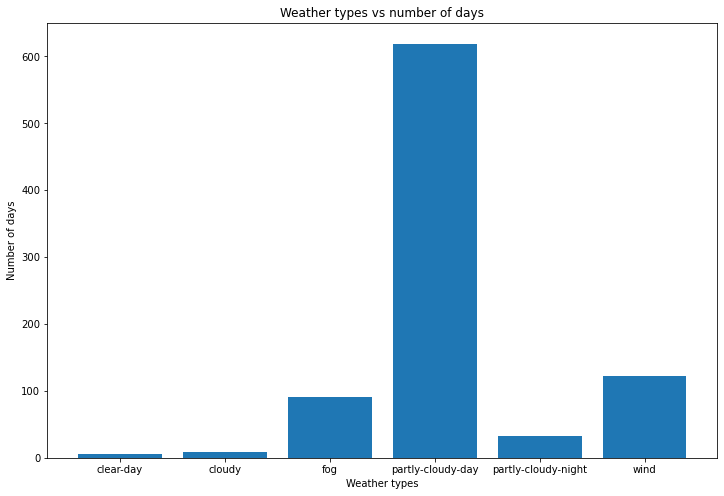

In [37]:
f = plt.figure("Weather types vs number of days", figsize=(12, 8))
a = plt.axes()

a.bar(weather_data_icon['icon'], weather_data_icon['day']['count']);
plt.title("Weather types vs number of days")
plt.xlabel('Weather types') 
plt.ylabel('Number of days') 

# Relationships

In [108]:
# selecting numeric variables
weather_data = weather_data[['day','temperatureMax','temperatureMin', 
                             'apparentTemperatureMax','apparentTemperatureMin',
                             'visibility', 'windBearing', 'pressure','cloudCover', 
                             'windSpeed', 'humidity','moonPhase', 'dewPoint']]

In [109]:
houses = energy_data.groupby('day')[['LCLid']].nunique()
energy_data1 = energy_data.groupby('day')['energy_mean'].agg('mean')
weather_energy = pd.merge(pd.merge(energy_data1, houses, on = 'day'), weather_data, on='day')
weather_energy.head(2)

,day,energy_mean,LCLid,temperatureMax,temperatureMin,apparentTemperatureMax,apparentTemperatureMin,visibility,windBearing,pressure,cloudCover,windSpeed,humidity,moonPhase,dewPoint
0,2011-11-23,0.281091,13,10.36,3.81,10.36,2.18,8.06,229,1027.12,0.36,2.04,0.93,0.94,6.29
1,2011-11-24,0.234207,25,12.93,8.56,12.93,7.01,10.64,204,1027.22,0.41,4.04,0.89,0.97,8.56


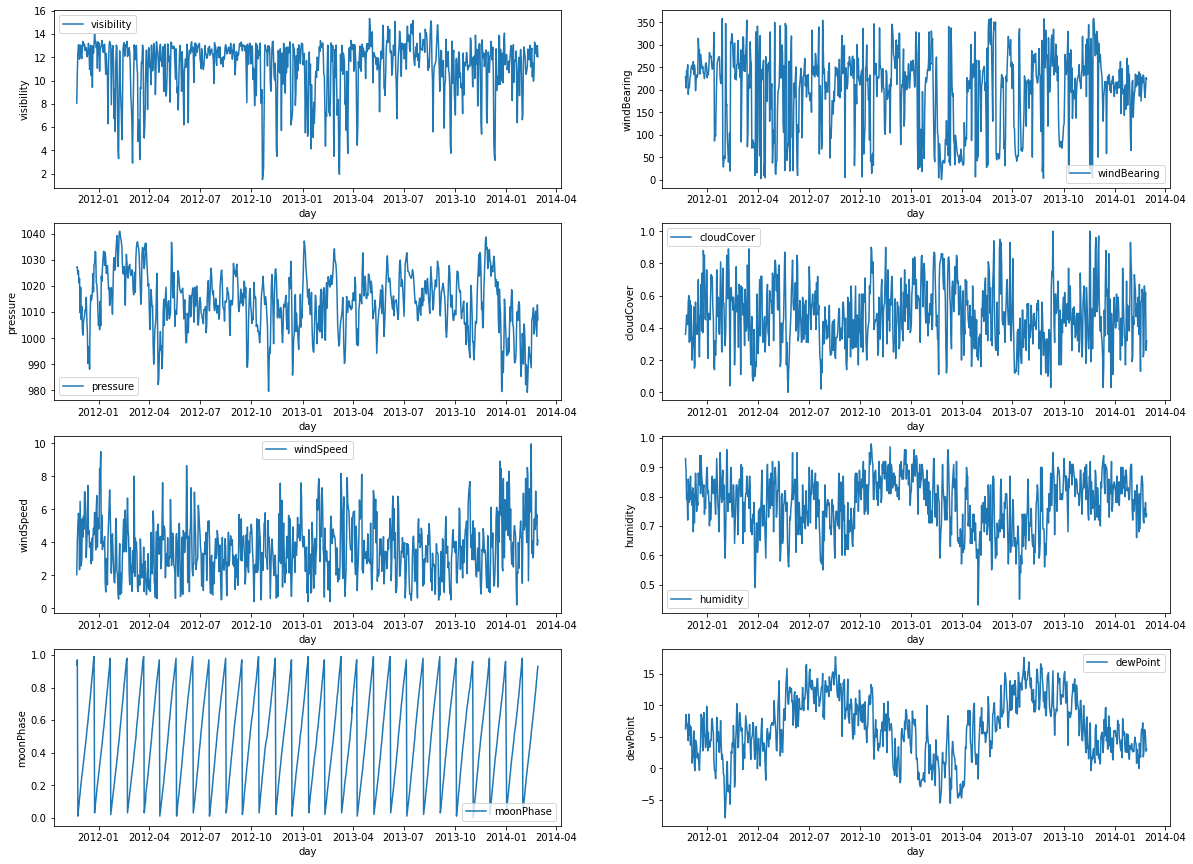

In [113]:
weather_feature = weather_data.columns.drop(['day','temperatureMax','temperatureMin', 
                             'apparentTemperatureMax','apparentTemperatureMin'])

fig,ax = plt.subplots(4,2,figsize = (20,15))
axs = ax.ravel()

for i, feature in enumerate(weather_feature):
    weather_energy.plot('day', feature, ax=axs[i])
    axs[i].set_ylabel(feature)


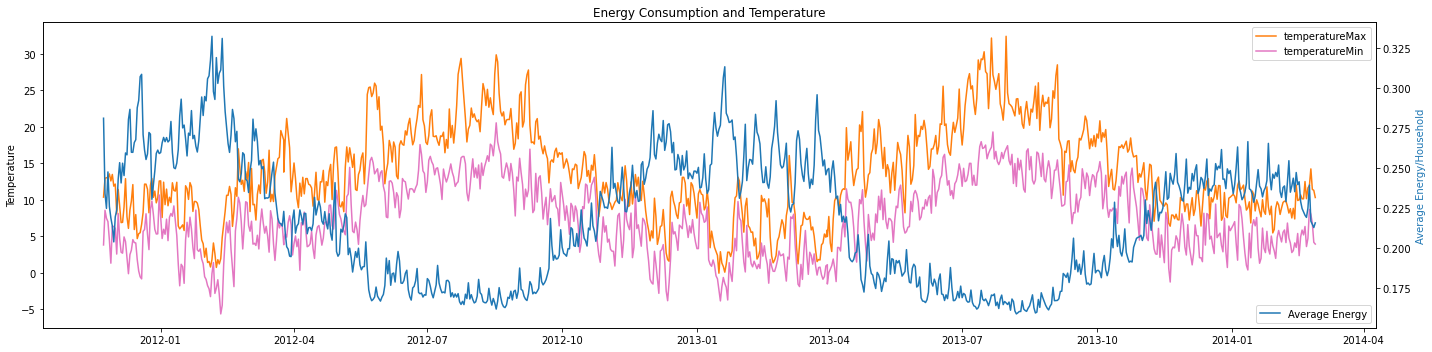

In [70]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange', label="temperatureMax")
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink', label="temperatureMin")

ax1.set_ylabel('Temperature')

ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_mean,color = 'tab:blue', label="Average Energy")
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')

plt.title('Energy Consumption and Temperature')
fig.tight_layout()

ax1.legend(loc="upper right")
ax2.legend(loc="lower right")